# Imports
Import the necessary packages and settings for the project.~~~~

In [464]:
#Data Manipulation Packages
import pandas as pd
import numpy as np

#Geometry Packages
import geopandas as gpd
from shapely.geometry import Point,Polygon

#Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics Packages
from scipy.stats import chi2_contingency
 
#Package Settings
%matplotlib inline 
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

# Given Data Loading

Import data from files into managable data_frames.

In [212]:
targeted_precincts = np.array([9, 10, 11, 44, 46, 285, 347, 379, 411, 430, 431, 664, 752, 792, 793])

In [235]:
# Loading Cleaned Data(Cleaning found in seperate jupyter notebook)
registered_voters = pd.read_csv('./Data/registered_voters.csv')
voters = pd.read_csv('./Data/voters.csv')
voters.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True, errors='ignore')
voters.date_voted = pd.to_datetime(voters.date_voted)
registered_voters.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True, errors='ignore')

#Loading Additional Provided Data
gotv_targeted = pd.read_excel('./Data/GOTV_TargetVoters.xlsx')

precinct_data = pd.read_csv('./Data/HOUSTON_LIMITS_BOUNDARIES_PACKAGE.csv') #May or may not be useful

poll_location_codes = pd.read_excel('./Data/PollLocations_Codes_Nov2022Election.xlsx')

gotv_mailing = pd.read_excel('./Data/GOTVMailers_Efforts.xlsx') 

# Outside Data Loading

This data was found from these outside sources:
- https://www.harrisvotes.com/Voter/Registration/Voter-Precinct-Data
- https://www.harrisvotes.com/Voter/Registration/Jurisdiction-Precinct-Maps

In [215]:
complete_harris_voters = pd.concat(map(pd.read_csv,['./Data/all_harris_voters(1:2).csv','./Data/all_harris_voters(2:2).csv']))

# Investigating Voter Information

- ##### Voters who are not Registered (Weird...)
- ##### Proportion of people who didn't vote = 0.856422
- #####

[]

<Figure size 432x288 with 0 Axes>

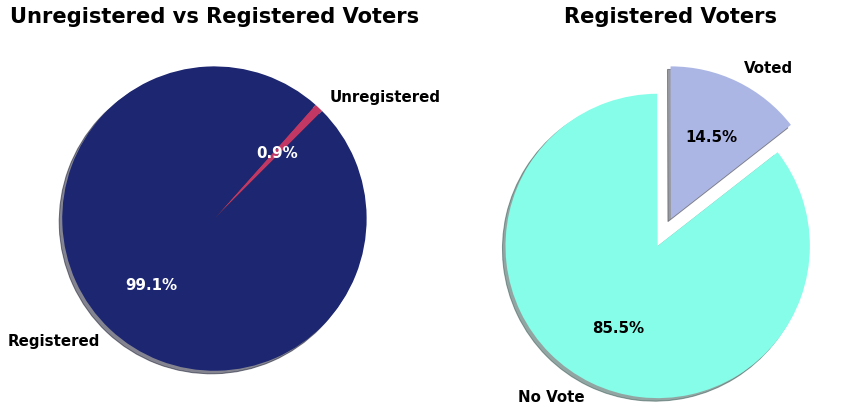

In [434]:
unregistered_voters = set(voters['voter_id']).difference(set(complete_harris_voters['Vuid']))
plt.figure(0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

labels = 'Unregistered', 'Registered'
sizes = len(unregistered_voters) / len(set(voters['voter_id'])), 1 - (len(unregistered_voters) / len(set(voters['voter_id'])))
inner_color = ["#C33764", "#1D2671"]
_, _, autotexts = ax1.pie(sizes, colors = inner_color, labels=labels, autopct='%1.1f%%',textprops={"fontsize": 15, 'fontweight': 'bold'},
        shadow=True, startangle=45)
for autotext in autotexts:
    autotext.set_color('white')

ax1.set_title('Unregistered vs Registered Voters', fontdict={'fontsize': 21 ,'fontweight': 'bold'})

labels = 'Voted', 'No Vote'
sizes = len(set(voters['voter_id'])) / len(set(registered_voters['voter_id'])), 1 - len(set(voters['voter_id'])) / len(set(registered_voters['voter_id']))
inner_color = ["#ACB6E5", "#86FDE8"]
explosions = 0, 0.2
_, _, autotexts = ax2.pie(sizes,explode=explosions, colors = inner_color, labels=labels, autopct='%1.1f%%',textprops={"fontsize": 15, 'fontweight': 'bold'},
        shadow=True, startangle=38)
ax2.set_title('Registered Voters', fontdict={'fontsize': 21 ,'fontweight': 'bold'})
ax1.plot()
ax2.plot()

# Gender and Age Statistics for All Voters


938


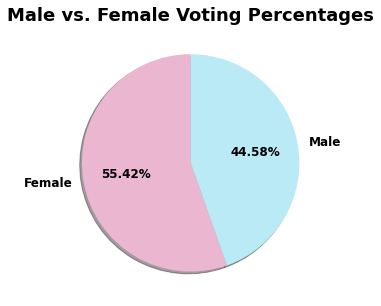

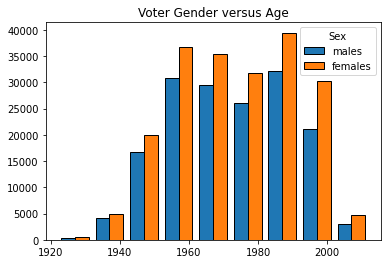

Text(0.5, 1.0, 'Voter Birth Years')

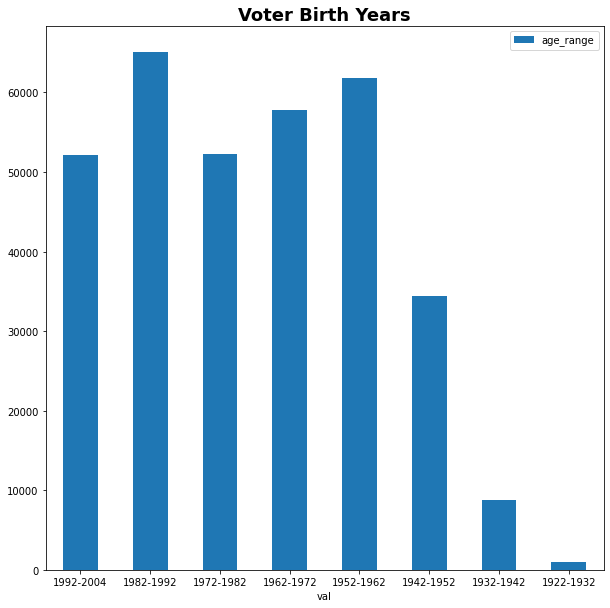

In [437]:
ax = plt.subplots(1, figsize=(5, 5))
inner_color = ["#EBB6D0", "#BBEAF7"]
voters['sex'].value_counts().plot.pie(labels = ['Female','Male'],autopct='%1.2f%%',startangle=90, colors = inner_color,textprops={"fontsize": 12, 'fontweight': 'bold'},
        shadow=True)
plt.axis('off')
plt.title('Male vs. Female Voting Percentages',fontdict={'fontsize': 18 ,'fontweight': 'bold'})
plt.show()

#Labelling Genders
males = voters.query('sex == 1')
females = voters.query('sex == 0')

#Histogram of Birth Year
year_hist = plt.hist([males.birth_year,females.birth_year ], rwidth = 0.8, edgecolor='black', bins=np.arange(1922, max(voters.birth_year) + 10, 10))
plt.legend(['males', 'females'], loc='best', title='Sex')
plt.title('Voter Gender versus Age')
plt.show()


#Bar Graph of Birth Years
twenty_voters = voters.query( 'birth_year > 1992')
thirty_voters = voters.query('birth_year < 1992 & birth_year >1982')
fourty_voters = voters.query('birth_year < 1982 & birth_year >1972')
fifty_voters = voters.query('birth_year < 1972 & birth_year >1962')
sixty_voters = voters.query('birth_year < 1962 & birth_year >1952')
seventy_voters = voters.query('birth_year < 1952 & birth_year >1942')
eighty_voters = voters.query('birth_year < 1942 & birth_year >1932')
ninty_voters = voters.query('birth_year < 1932 & birth_year > 1922')
print(len(ninty_voters))
age_voters = pd.DataFrame({'age_range':[len(twenty_voters),
                                len(thirty_voters),len(fourty_voters),len(fifty_voters),len(sixty_voters),len(seventy_voters),len(eighty_voters),len(ninty_voters)], 
                           'val':['1992-2004', '1982-1992', '1972-1982', '1962-1972','1952-1962', '1942-1952','1932-1942', '1922-1932']})


ages_bargraph = age_voters.plot.bar(x='val', y='age_range', rot=0, figsize = (10,10))

plt.title('Voter Birth Years',fontdict={'fontsize': 18 ,'fontweight': 'bold'})




# Voting Type

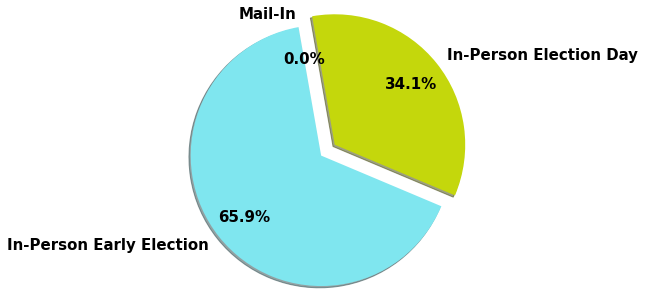

In [465]:
explosions = 0, .2, 0
inner_color = ["#7fe6ef", "#c4d70c", "#c22303"]
voters['vote_type'].value_counts().plot.pie(labels = ['In-Person Early Election', 'In-Person Election Day','Mail-In','Provisional','Absentee'],
                                            autopct='%1.1f%%',radius = 1.5 ,pctdistance = 0.75, colors=inner_color, startangle = 100, 
                                            textprops={"fontsize": 15, 'fontweight': 'bold'}, shadow=True, explode=explosions)
plt.axis('off')
old_voters = voters.query('birth_year < 1972')
young_voters = voters.query('birth_year>=1972')

old_voters['age'] = 1
young_voters['age'] = 0

voters = pd.concat([old_voters, young_voters], axis = 0)

contigency = pd.crosstab(voters['age'], voters['vote_type'])


# Polling Location

<AxesSubplot:ylabel='Frequency'>

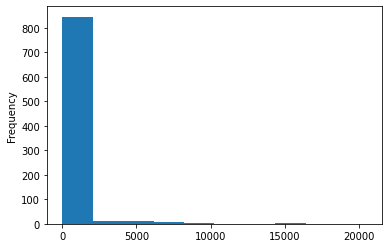

In [200]:

voters['voting_site'].value_counts().plot.hist()
plt.title('Frequency of different Poll Locations in Harrison County')
plt.xlabel('')

# Block Walking

Note:
Majority of the people at the doors were not at home, Moved away, Inaccessable, Refused to answer the door, spoke another language, or were deceased.

This is an indication that the current of selecting homes is flawed as there seems to be a wasted allocation of resources for two reasons.

1) There could a better usage of resources in determining whether people could answer the door so that that most 

In [141]:
gotv_target = pd.read_excel('./Data/GOTV_TargetVoters.xlsx')
gotv_target.head()

# Targeted Subjects

In [382]:
gotv_targeted 

,Voter ID,City,Zip5,Age,Sex,PrecinctName
0,1122198569,Houston,77009,59,F,Harris - 0046
1,1114307920,Houston,77003,63,M,Harris - 0010
2,1186408232,Pasadena,77504,74,F,Harris - 0347
3,1161567574,Pasadena,77504,53,F,Harris - 0752
4,1068564056,Houston,77026,56,M,Harris - 0046
...,...,...,...,...,...,...
22041,2183568938,Houston,77087,19,F,Harris - 0285
22042,2191650739,Pasadena,77504,21,M,Harris - 0752
22043,2167872180,Houston,77003,54,F,Harris - 0010
22044,2184783273,Pasadena,77504,25,F,Harris - 0793


# Combo Effect

### Getting Columns Cleaned

In [193]:
# total_voters_attempted = gotv_walk_id.update(gotv_texting_id, mailing_id, gotv_calling_id)
#data_files = ['./Data/GOTVMailers_Efforts.xlsx', './Data/PhoneBank_Efficacy.csv', './Data/TextBanking_Efforts.xlsx', './Data/BlockWalking_Effort.csv']
frames = [pd.read_csv('./Data/PhoneBank_Efficacy.csv'), pd.read_csv('./Data/BlockWalking_Effort.csv'),
          pd.read_excel('./Data/TextBanking_Efforts.xlsx'), pd.read_excel('./Data/GOTVMailers_Efforts.xlsx')]

names = {'VoterID': 'voter_id', 'Sex': 'sex', 'Age':'age', 'Zip5':'zip', 'result of attempt':'result',
         'Voter ID': 'voter_id', 'City':'city', 'Result': 'result', 'PrecinctName': 'precinct_name',
         'Date Called': 'date_called', 'Time Called (EST)': 'time_called', 'Date of Attempt': 'date_of_attempt'}
for index, frame in enumerate(frames):
    frame.rename(columns=names, inplace = True)
    print(frames[index].columns)

Index(['voter_id', 'date_called', 'time_called', 'result'], dtype='object')
Index(['voter_id', 'date_of_attempt', 'city', 'zip', 'result'], dtype='object')
Index(['timestamp', 'message_direction', 'voter_id'], dtype='object')
Index(['voter_id', 'city', 'zip', 'age', 'sex', 'precinct_name'], dtype='object')


### Helper Functions

In [194]:
def times_appear(value):
    return len(gotv_texting.loc[gotv_texting['voter_id'] == value])

def calc_cost(index, num):
    # Calls, Doors, Texts, Post Cards
    coster = [.13, 2, .06, .35] 
    return coster[index] * num

print(frames[0].result.value_counts())
print()
print(frames[1].result.value_counts())
print()
print(frames[2].message_direction.value_counts())

Answering Machine           7476
Deliverability Error        1570
No Contact                  1551
Busy Signal                  980
No Answer                    661
Talked to Correct Person     536
Remove number from list      246
Fax                           10
Name: result, dtype: int64

Not Home          5257
Canvassed         1180
Moved              343
Inaccessible       171
Refused            119
Other Language      15
Deceased             5
Name: result, dtype: int64

outgoing     17531
incoming      1073
call            23
voicemail       15
media           13
Name: message_direction, dtype: int64


### Operations

In [463]:
# Calculates who voted and didnt
import math
votes = set(voters.voter_id)
costs = []
for i, frame in enumerate(frames):
    frame_id = set(frame['voter_id']) 
    frame_intersection = frame_id.intersection(votes) # All the potential voters who voted with the effort
    frame_who_voted = frame.query('voter_id in @frame_intersection')
    frame_who_not_voted = frame.query('voter_id not in @frame_intersection')
    frame_who_voted['voted'] = 1
    frame_who_not_voted['voted'] = 0
    
    if i == 2:
        costs.append(calc_cost(i, len(frames[i].query('message_direction == "outgoing"'))))
        costs[-1] += calc_cost(0, len(frames[i].query('message_direction == "call"')))
    else:
        costs.append(calc_cost(i, len(frames[i])))

    frames[i] = pd.concat([frame_who_voted, frame_who_not_voted], axis = 0)

costs = [(math.floor(price * 100)/ 100) for price in costs]
sum(costs)

<ipython-input-463-e230ffc84df1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_who_voted['voted'] = 1
<ipython-input-463-e230ffc84df1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_who_not_voted['voted'] = 0


26684.37

Note! That most of the Door to Door communication led to either going to houses that were empty or have another form of a barrier between them and the voter. For this process to be worth its value, it needs to make sure it is being properly allocated to voters and times that are appropriate. This can also be seen with the fact that they talk with the voter wasn't very impactful to the number that actually voted 

In [197]:
# We need to drop duplicates to not overcount the voters, also account for all voter ids in a set
all_voters = set()
for i, frame in enumerate(frames):
    frames[i]['num_times'] = frames[i]['voter_id'].map(times_appear)
    frames[i] = frames[i][~frames[i]['voter_id'].duplicated()]
    all_voters.update(set(frames[i].voter_id))
len(all_voters)

44499

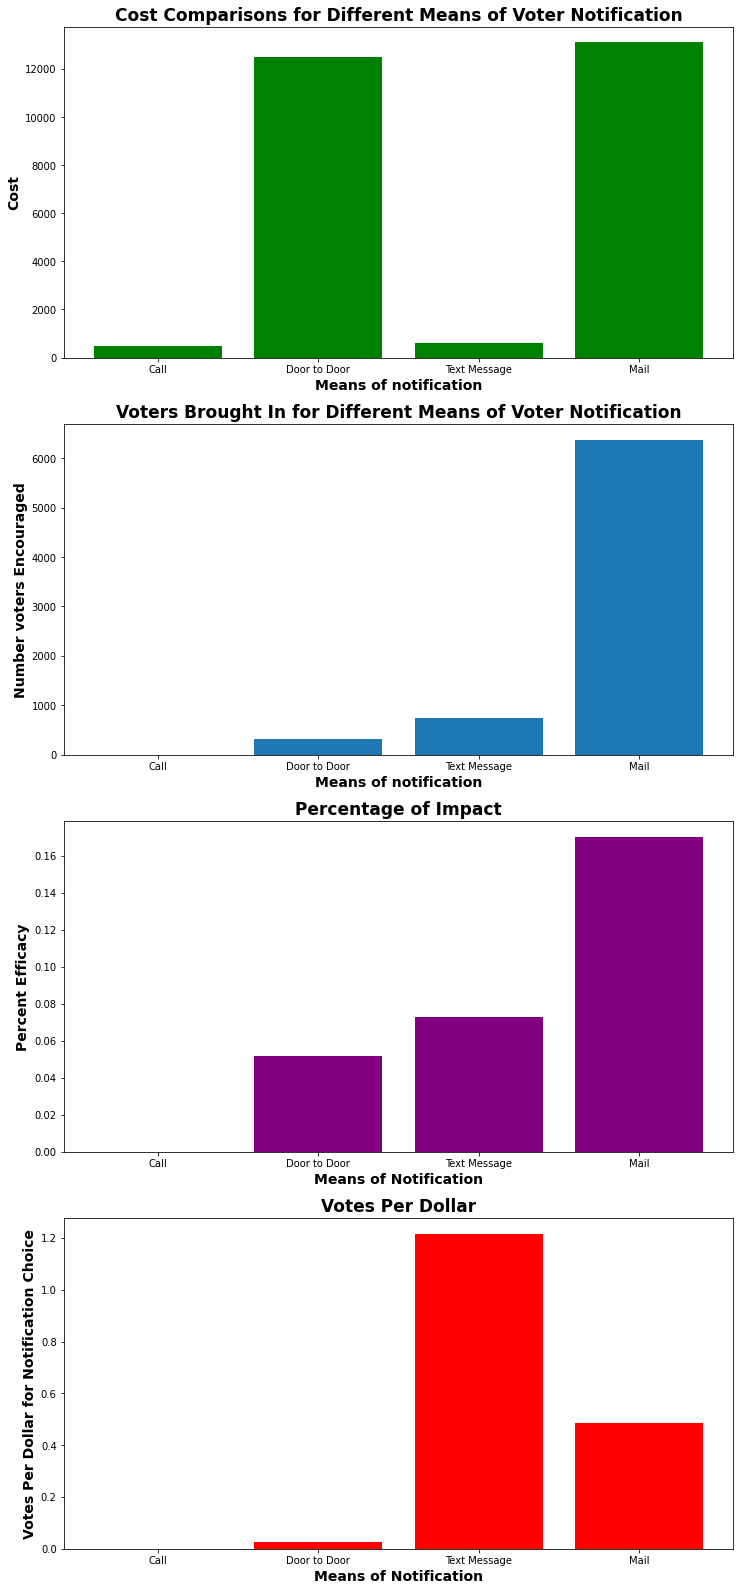

In [420]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(4, 1, figsize =(12, 28))
labels = 'Call', 'Door to Door', 'Text Message', 'Mail'
inner_color = ["#C33764", "#1D2671"]
ax1.bar(labels, costs, color='green')
ax1.set_xlabel("Means of notification", fontsize = 14, fontweight='bold')
ax1.set_ylabel("Cost", fontsize = 14, fontweight='bold')
ax1.set_title("Cost Comparisons for Different Means of Voter Notification", fontsize = 17, fontweight='bold')
ax1.plot()
heights = [len(set(voters['voter_id']).intersection(set(frame['voter_id']))) for frame in frames]
ax2.bar(labels, heights)
ax2.set_xlabel("Means of notification", fontsize = 14, fontweight='bold')
ax2.set_ylabel("Number voters Encouraged", fontsize = 14, fontweight='bold')
ax2.set_title("Voters Brought In for Different Means of Voter Notification", fontsize = 17, fontweight='bold')
ax2.plot()
heights = [len(set(voters['voter_id']).intersection(set(frame['voter_id'])))/len(frame['voter_id']) for frame in frames]
ax3.bar(labels, heights, color = 'purple')
ax3.set_xlabel("Means of Notification", fontsize = 14, fontweight='bold')
ax3.set_ylabel("Percent Efficacy", fontsize = 14, fontweight='bold')
ax3.set_title("Percentage of Impact", fontsize = 17, fontweight='bold')
ax3.plot()
heights = [len(set(voters['voter_id']).intersection(set(frame['voter_id'])))/cost for (frame, cost) in zip(frames, costs)]
ax4.bar(labels, heights, color = 'red')
ax4.set_xlabel("Means of Notification", fontsize = 14, fontweight='bold')
ax4.set_ylabel("Votes Per Dollar for Notification Choice", fontsize = 14, fontweight='bold')
ax4.set_title("Votes Per Dollar", fontsize = 17, fontweight='bold')
ax4.plot()
plt.show()

# High Turnout Precincts

<ipython-input-330-08905f500b80>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_top['age'] = 1
<ipython-input-330-08905f500b80>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_top['age'] = 0


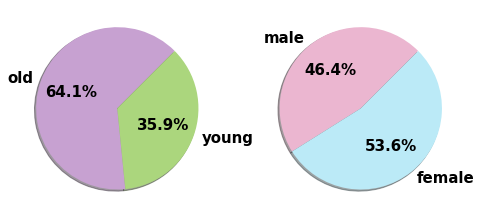

In [330]:
voters = voters.rename(columns={'Voting Precinct': 'voting_precinct'})
precinct = voters

precinct  = precinct.sort_values('voting_precinct')
precinct.head(100)

grouped_precincts = precinct.groupby(precinct.voting_precinct)

count = precinct.groupby(precinct.voting_precinct).count().voter_id

count = count.sort_values(ascending = False)

top_precincts = count.head(100).to_frame()

top_precincts['index'] = top_precincts.index


old_average = 0
young_average = 0

male_average = 0
female_average = 0
for i in top_precincts.index:  
    top = grouped_precincts.get_group(i)
    old_top = top.query('birth_year < 1982')
    young_top = top.query('birth_year>=1982')

    male_top = top.query('sex == 1')
    female_top = top.query('sex == 0')

    old_top['age'] = 1
    old_average += len(old_top)*1.0/len(top)

    young_top['age'] = 0
    young_average += len(young_top)*1.0/len(top)

    top = pd.concat([old_top,young_top], axis = 0)

   
    male_average += len(male_top)*1.0/len(top)

    female_average += len(female_top)*1.0/len(top)


inner_color = ["#c7a1d1", "#abd67d"]
age_averages = [old_average, young_average]
age_labels = ['old', 'young']
fig1, (ax1, ax2) = plt.subplots(1,2, figsize = (8,8))
ax1.pie(age_averages, labels=age_labels, autopct='%1.1f%%', textprops={"fontsize": 15, 'fontweight': 'bold'},
        shadow=True, startangle=45, colors=inner_color)

sex_averages = [male_average, female_average]
sex_labels = ['male', 'female']
inner_color = ["#EBB6D0", "#BBEAF7"]
ax2.pie(sex_averages, labels=sex_labels, autopct='%1.1f%%', textprops={"fontsize": 15, 'fontweight': 'bold'},
        shadow=True, startangle=45, colors=inner_color)

ax1.plot()
ax2.plot()
plt.show()

# MAPPING

In [135]:
polling_df = pd.read_csv('./Data/polllatlong.csv')
polling_df.dropna(subset = ['lat'],inplace=True)

In [136]:
res = polling_df.loc[~polling_df['EVIdentifier'].isna()][['Poll Codes', 'EVIdentifier']]
diction = zip(res['EVIdentifier'],res['Poll Codes'])
diction = list(diction)
diction = {x:y for (x,y) in diction}

In [137]:
def fix(x):
    return x if x.isnumeric() else diction[x]
voters['Poll Codes'] = voters.apply(lambda x: fix(x['voting_site']), axis=1)
site_counts = voters.groupby('Poll Codes').count().voter_id

In [138]:
number_at_polls = voters.groupby('Poll Codes').count()[['voter_id']]
number_at_polls['Poll Codes'] = number_at_polls.index
number_poll_conv = list(zip(number_at_polls['Poll Codes'], number_at_polls['voter_id']))
number_poll_conv = {x: y for (x,y) in number_poll_conv}

,voter_id,Poll Codes
Poll Codes,,
11003,295,11003
11033,1744,11033
11037,5077,11037
11045,347,11045
11067,2729,11067
...,...,...
92138,38,92138
92140,522,92140
92141,100,92141


In [175]:
def find_num_voters(x):
    return number_poll_conv[x] if x in number_poll_conv.keys() else 0
polling_df['num_voters'] = polling_df.apply(lambda x: find_num_voters(x['Poll Codes']), axis=1)
polling_df = polling_df.query('num_voters > 0')
polling_df['num_voters_sqrt'] =  polling_df.apply(lambda x: x['num_voters'] ** (1/2), axis=1)

/opt/python/envs/default/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


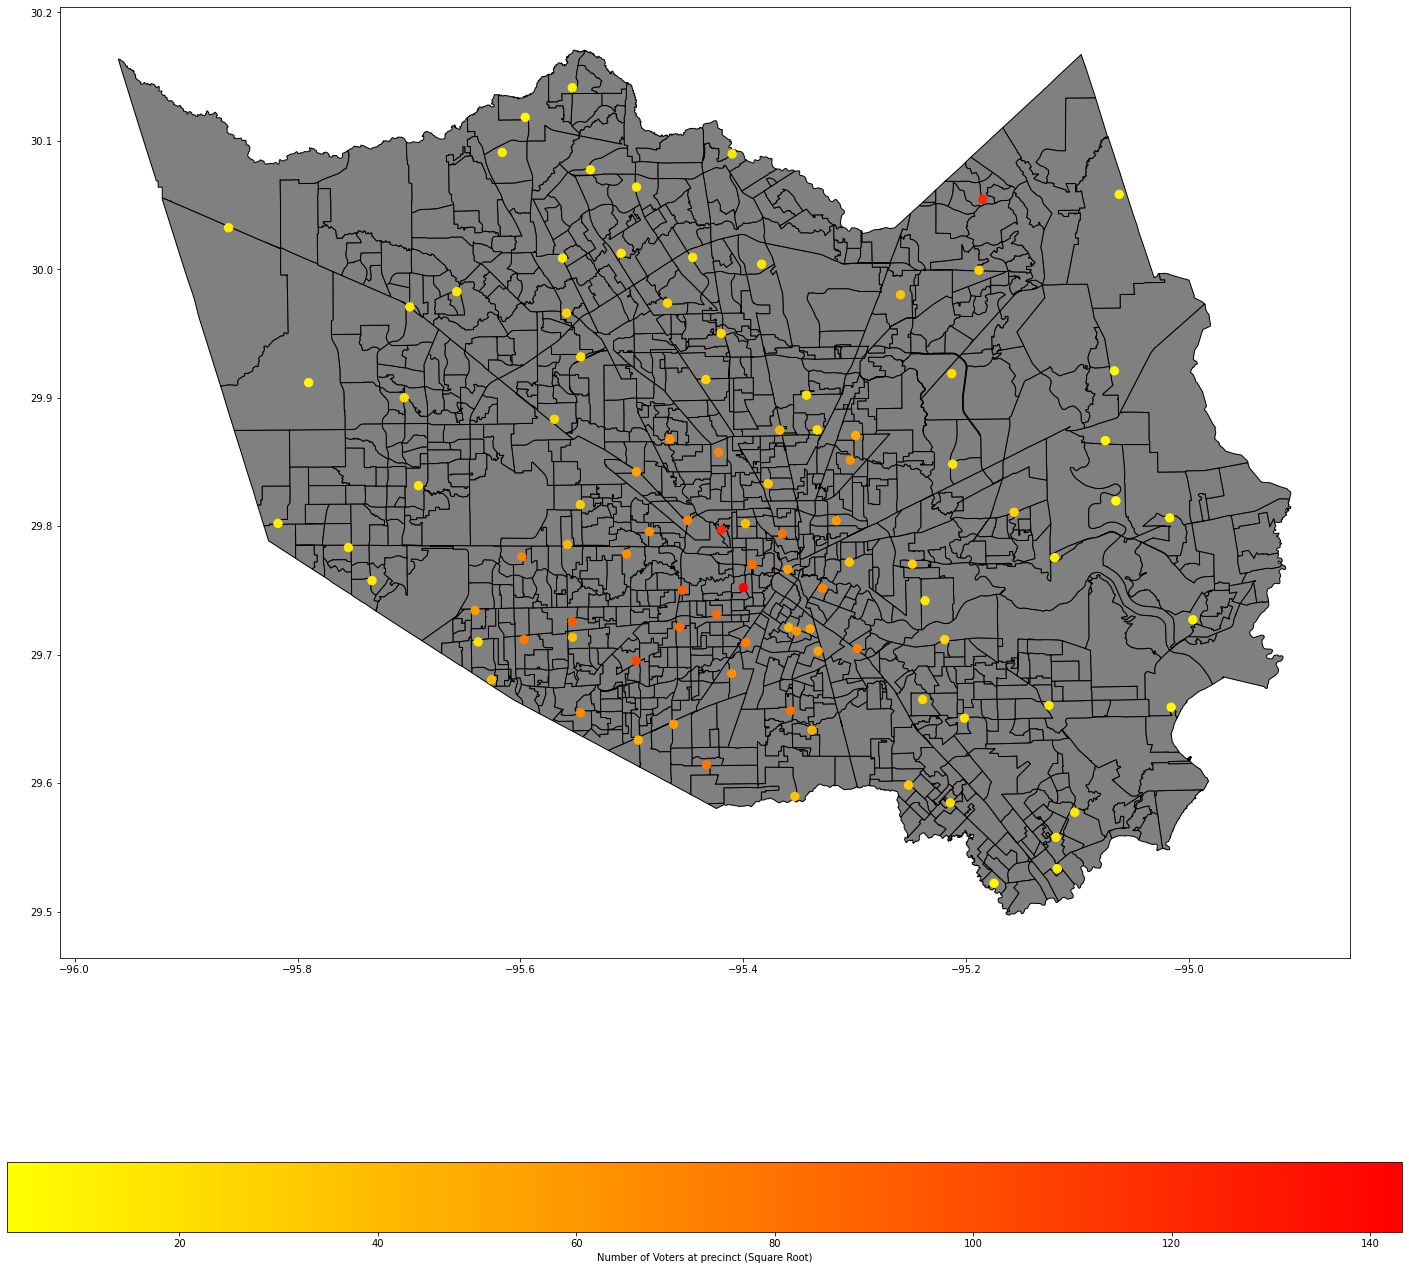

In [331]:
!pip install pyshp
!pip install mapclassify
import shapefile
import matplotlib.colors as mcolors

harris_count_precinct_map = gpd.read_file('./Data/HOUSTON_LIMITS_BOUNDARIES_PACKAGE.shp')


polling_locations = polling_df[['lat','lng', 'num_voters_sqrt']]
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(polling_df['lng'],polling_df['lat'])]

geo_df = gpd.GeoDataFrame(polling_locations,crs=crs,geometry=geometry)
 #print(geo_df.head())
fig,ax = plt.subplots(figsize = (25,25))

harris_count_precinct_map.plot(ax=ax,color = 'gray',edgecolor = 'black')

geo_df.plot(ax=ax, markersize = 70, column='num_voters_sqrt', legend = True, legend_kwds={'label': "Number of Voters at precinct (Square Root)",
                        'orientation': "horizontal"}, cmap='autumn_r')
plt.show()

In [384]:
complete_harris_voters

,Status,Certificate Number,Vuid,Precinct,First Name,Last Name,StreetNumber,Street,Unit,City,Zip,Effective Date
0,Active,87284774,2121088350,1,GERARD CHRISTIAN,ST LAURENT,2620,N SABINE ST,NaN,HOUSTON,77009,09/03/2021
1,Active,82182379,1142800603,1,ANGELICA DENISE,AGUILAR,2620,N SABINE ST,NaN,HOUSTON,77009,06/20/2021
2,Active,70228341,1037827892,1,STEPHEN GRAHAM,SCOTT,1833,HICKORY ST,NaN,HOUSTON,77007,11/03/2015
3,Active,24907347,1112212281,1,GEORGE WALKER,YOUNGBLOOD,1212,EDWARDS ST,A,HOUSTON,77007,11/13/2020
4,Active,78548773,2136302518,1,NEENA,THOKALA,2617,BEAUCHAMP ST,NaN,HOUSTON,77009,04/28/2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1137684,Active,69697449,1153442468,1152,SARAH LOUISE,KOUBA,25702,BEAVER RUN DR,NaN,HUFFMAN,77336,07/12/2018
1137685,Active,85811339,2174265420,1152,JAY COREY,LAWRENCE,25827,WATER RIDGE DR,NaN,HUFFMAN,77336,11/03/2020
1137686,Active,51464196,1119839268,1152,CHARLES FREDIRICKS,ADAMS,25908,WATER RIDGE DR,NaN,HUFFMAN,77336,01/01/2002
1137687,Active,71147102,1198996078,1152,CHRISTOPHER MARVIN,THISTLE,25738,BEAVER RUN DR,NaN,HUFFMAN,77336,04/26/2021


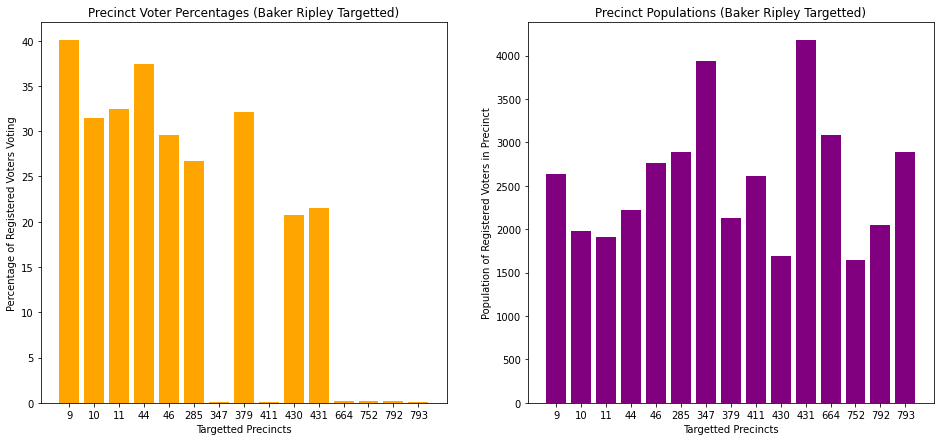

In [451]:
#relative population by precinct
precinct_population = complete_harris_voters['Precinct'].value_counts()
precinct_voted = voters.groupby('voting_precinct').count().voter_id
precinct_percentages = (precinct_voted* 100)/precinct_population 
precinct_population['precinct'] = complete_harris_voters['Precinct'].unique()
precinct_population['count'] = complete_harris_voters.groupby('Precinct').Precinct.count()
precinct_population
#precincts = voters.groupby('voting_precinct')[['sex']].sum()
#precincts['total'] = voters.groupby('voting_precinct').voter_id.count()
target_voters_population = precinct_population[targeted_precincts]
target_voters_voted = precinct_voted[targeted_precincts]
target_voters_percentage = (target_voters_voted*100) / target_voters_population
target_voters_percentage
labels = list(target_voters_percentage.index)
labels = [str(item) for item in labels]
heights = list(target_voters_percentage)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(16, 7))
ax1.bar(labels, heights, color = 'orange')
ax1.set_xlabel('Targetted Precincts')
ax1.set_ylabel('Percentage of Registered Voters Voting')
ax1.set_title('Precinct Voter Percentages (Baker Ripley Targetted)')
ax1.plot()
heights = list(target_voters_population)
ax2.bar(labels, heights, color='purple')
ax2.set_xlabel('Targetted Precincts')
ax2.set_ylabel('Population of Registered Voters in Precinct')
ax2.set_title('Precinct Populations (Baker Ripley Targetted)')
ax2.plot()
plt.show()